--Temperature (T) in the range 1.81°C to 37.11°C,
--Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
--Relative Humidity (RH) in the range 25.56% to 100.16%
--Exhaust Vacuum (V) in the range 25.36-81.56 cm HgNet hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

Installing Packages & Libraries

In [70]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
import csv
import os
import warnings
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
# Define the file path of your CSV file
file_path = r'C:\Users\stoma\Downloads\CCPP_data.csv'

# Open the CSV file and read its contents
df = pd.read_csv(file_path)
df.shape

(9568, 5)

## Summary Statistic

In [83]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


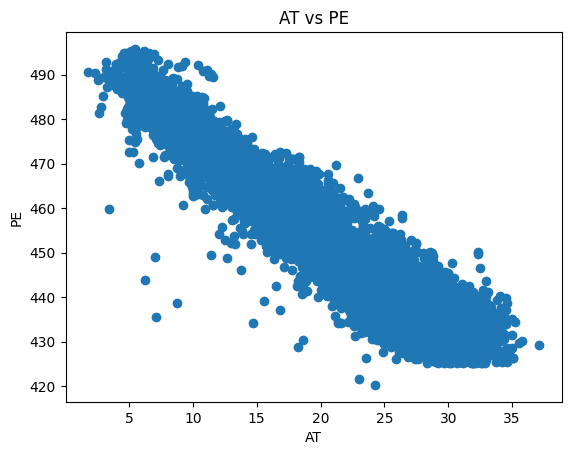

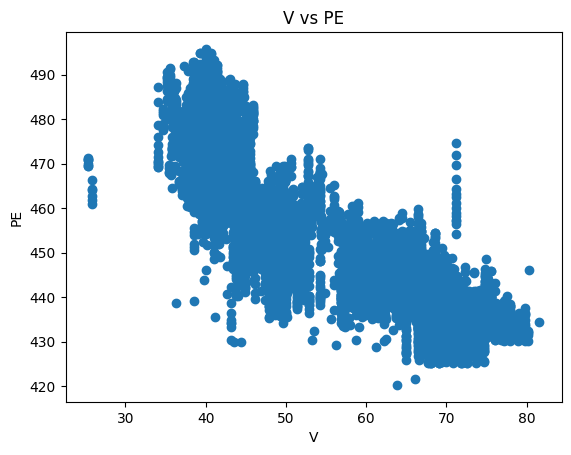

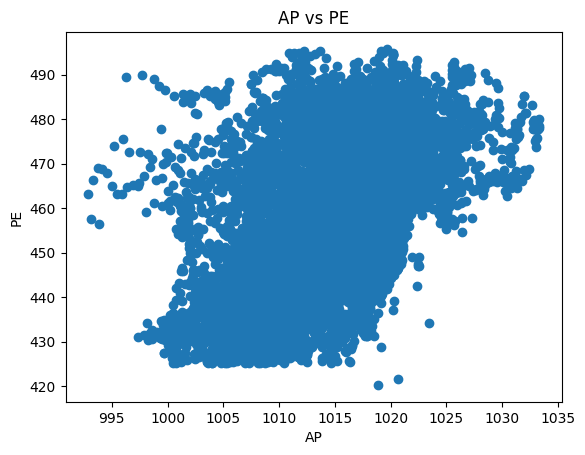

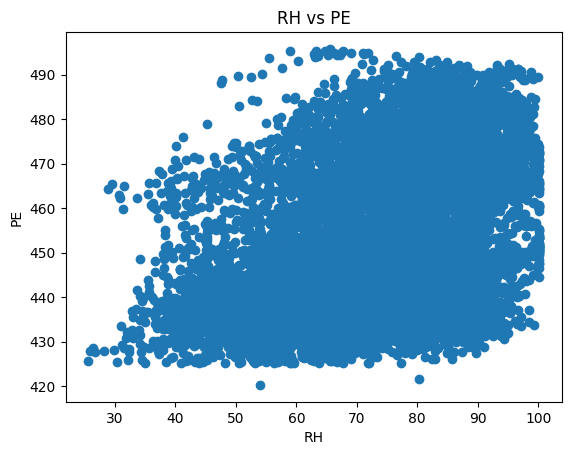

In [92]:
plt.scatter(df['AT'], df['PE'])
plt.xlabel("AT")
plt.ylabel("PE")
plt.title(f'{"AT"} vs {"PE"}')
plt.show()

plt.scatter(df['V'], df['PE'])
plt.xlabel("V")
plt.ylabel("PE")
plt.title(f'{"V"} vs {"PE"}')
plt.show()


plt.scatter(df['AP'], df['PE'])
plt.xlabel("AP")
plt.ylabel("PE")
plt.title(f'{"AP"} vs {"PE"}')
plt.show()

plt.scatter(df['RH'], df['PE'])
plt.xlabel("RH")
plt.ylabel("PE")
plt.title(f'{"RH"} vs {"PE"}')
plt.show()


In [162]:
#normalizing the data:
scaler = MinMaxScaler()
df_nor = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

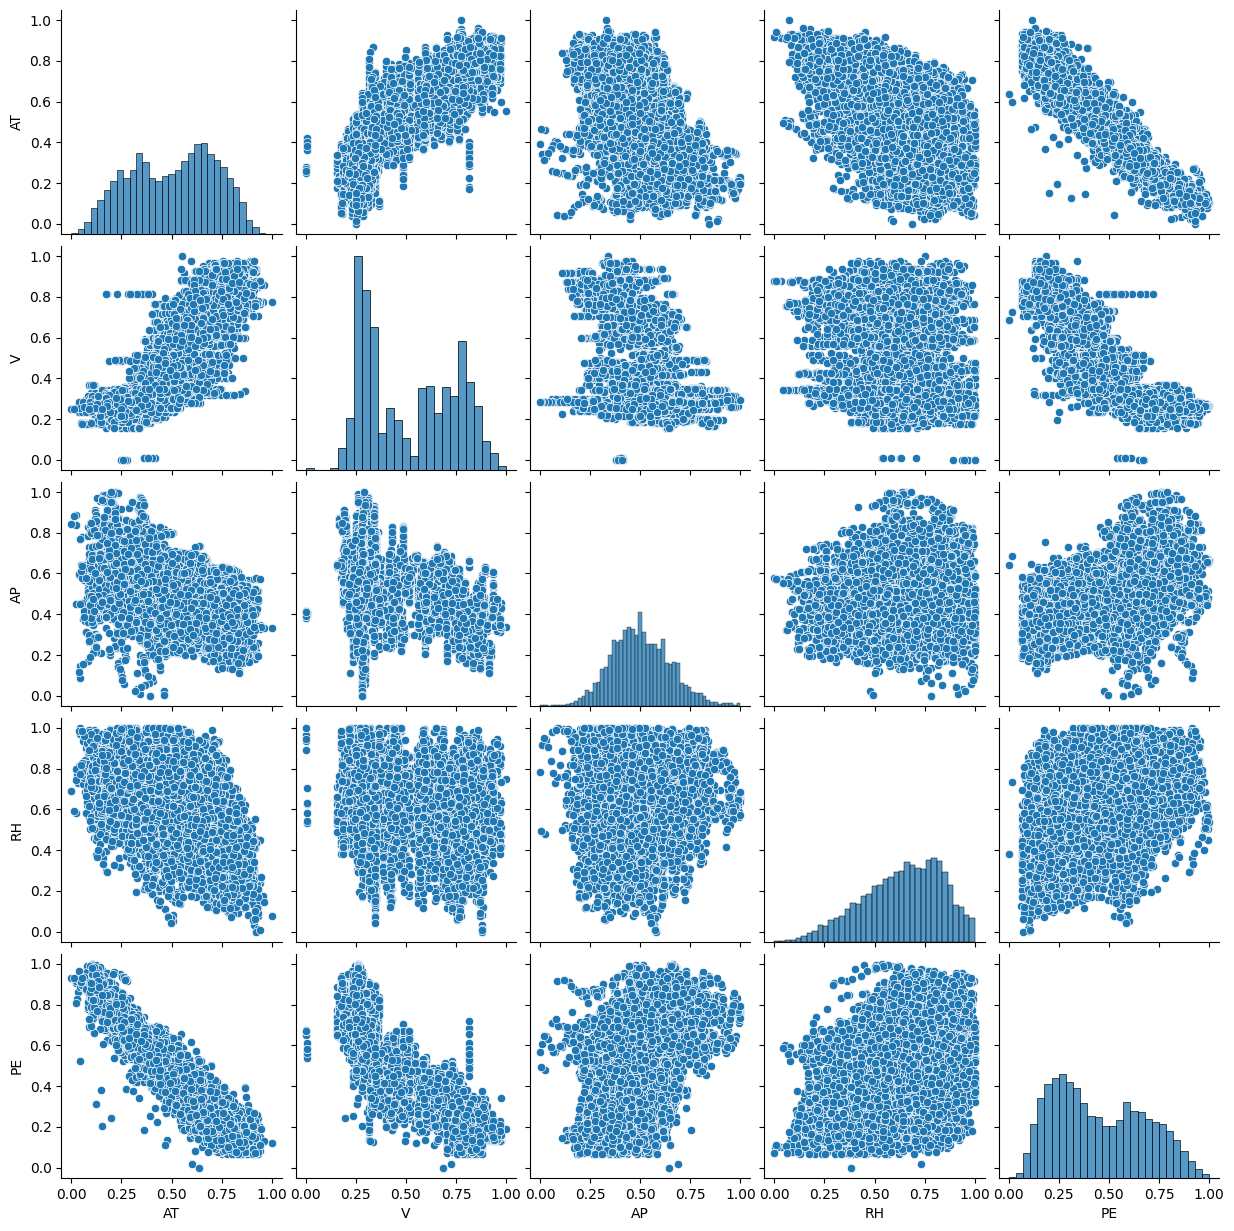

In [163]:
sns.pairplot(df_nor)
plt.show()

## Defining Variables & Targets

In [164]:
x=df_nor.iloc[:,0:4]
y=df_nor.iloc[:,-1]

##  Splitting Train and Test Dataset

In [149]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (7654, 4)
Train_y Shape:  (7654,)
Test_x Shape:  (1914, 4)
Test_y Shape:  (1914,)


## 1. Decision Tree Regressor

In [150]:
max_depth_=[2,5,8,10]
mse_dtm_test=[]

for max_value in max_depth_:
    dtm = DecisionTreeRegressor(max_depth=max_value)
    dtm.fit(train_x,train_y)
    y_test_pred = dtm.predict(test_x)
    mse_dtm= mean_squared_error(test_y, y_test_pred)
    mse_dtm_test.append(mse_dtm)

print("MSE for each max_depth:", mse_dtm_test)

MSE for each max_depth: [1.4025771628562506e-05, 2.554803320706143e-06, 7.070749927008964e-07, 3.9047953119911096e-07]


In [159]:
feature_importances = pd.DataFrame(dtm.feature_importances_,
                                   index=train_x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
AP,0.971749
RH,0.019047
V,0.009144
AT,0.000060


In [165]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=8)
dt_model.fit(train_x, train_y)
dt_mse = mean_squared_error(test_y, dt_model.predict(test_x))


# 2. Gradient Boosting Regressor 

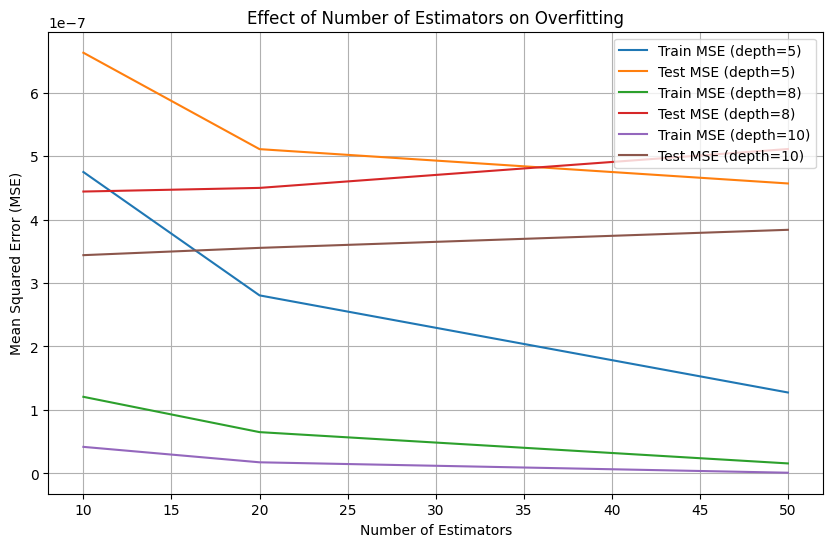

In [153]:
n_estimators_range = [10,20,50]
n_max_depth=[5,8,10]
train_mses = []  # List to store train MSEs
test_mses = []   # List to store test MSEs

for estimator in n_estimators_range:
    for depth in n_max_depth:
        gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=estimator, learning_rate=1.0)
        gbr.fit(train_x, train_y)
        
        # Predict on the training set
        train_predictions = gbr.predict(train_x)
        train_mse = mean_squared_error(train_y, train_predictions)
        train_mses.append(train_mse)
        
        test_predictions = gbr.predict(test_x)
        test_mse = mean_squared_error(test_y, test_predictions)
        test_mses.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
for depth in n_max_depth:
    plt.plot(n_estimators_range, train_mses[n_max_depth.index(depth)::len(n_max_depth)], label=f'Train MSE (depth={depth})')
    plt.plot(n_estimators_range, test_mses[n_max_depth.index(depth)::len(n_max_depth)], label=f'Test MSE (depth={depth})')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Number of Estimators on Overfitting')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(max_depth=10, n_estimators=20, learning_rate=1.0)
gbr_model.fit(train_x, train_y)
gbr_mse = mean_squared_error(test_y, gbr_model.predict(test_x))

# Feature Selection
selector = SelectFromModel(gbr_model, threshold=0.01) 
selector.fit(train_x, train_y)
selected_features = train_x.columns[selector.get_support()]
train_x_selected = train_x[selected_features]
test_x_selected = test_x[selected_features]


# 3. Linear Regression 

In [175]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]  

# Initialize lists to store results
ridge_mse=[]
lasso_mse = []
elasticnet_mse = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_x, train_y)
    y_pred_ridge = ridge_model.predict(test_x)
    mse_ridge = mean_squared_error(test_y, y_pred_ridge)
    ridge_mse.append(mse_ridge)
    
    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(train_x, train_y)
    y_pred_lasso = lasso_model.predict(test_x)
    mse_lasso = mean_squared_error(test_y, y_pred_lasso)
    lasso_mse.append(mse_lasso)
    
    # ElasticNet Regression
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet_model.fit(train_x, train_y)
    y_pred_elasticnet = elasticnet_model.predict(test_x)
    mse_elasticnet = mean_squared_error(test_y, y_pred_elasticnet)
    elasticnet_mse.append(mse_elasticnet)

# Find the best alpha values
best_alpha_ridge = alpha_values[np.argmin(ridge_mse)]
best_alpha_lasso = alpha_values[np.argmin(lasso_mse)]
best_alpha_elasticnet = alpha_values[np.argmin(elasticnet_mse)]

# Print the results
print("Ridge MSE:", ridge_mse)
print("Best Ridge Alpha:", best_alpha_ridge)
print("Lasso MSE:", lasso_mse)
print("Best Lasso Alpha:", best_alpha_lasso)
print("ElasticNet MSE:", elasticnet_mse)
print("Best ElasticNet Alpha:", best_alpha_elasticnet)

Ridge MSE: [1.6554604501826954e-07, 1.121617929412922e-06, 8.452497492734845e-06, 3.5031413364518156e-05, 0.00010909557742389807, 0.0001380786098776473]
Best Ridge Alpha: 0.001
Lasso MSE: [0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623]
Best Lasso Alpha: 0.001
ElasticNet MSE: [0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623, 0.00014217746163553623]
Best ElasticNet Alpha: 0.001


In [172]:
# Linear Regression Models
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(train_x, train_y)
ridge_mse = mean_squared_error(test_y, ridge_model.predict(test_x))

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(train_x, train_y)
lasso_mse = mean_squared_error(test_y, lasso_model.predict(test_x))

elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet_model.fit(train_x, train_y)
elastic_mse = mean_squared_error(test_y, elasticnet_model.predict(test_x))

## Comparing Results of Different Models

In [174]:
models = ['Decision Tree', 'Gradient Boosting',  'ElasticNet','Ridge','Lasso']
mses = [dt_mse, gbr_mse, elastic_mse, ridge_mse,lasso_mse]

for model, mse in zip(models, mses):
    print(f'{model} MSE: {mse}')

# Model Comparison
best_model = models[np.argmin(mses)]
print()
print(f'Best Model: {best_model}')

Decision Tree MSE: 7.070749927008995e-07
Gradient Boosting MSE: 3.720363617623344e-07
ElasticNet MSE: 0.00014217746163553623
Ridge MSE: 1.121617929412922e-06
Lasso MSE: 0.00014217746163553623

Best Model: Gradient Boosting
